## Importing packages

In [1]:
import cv2
import matplotlib.pyplot as plt

## Reading and displaying an image

In [ ]:
image = cv2.imread('images/car1.jpeg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

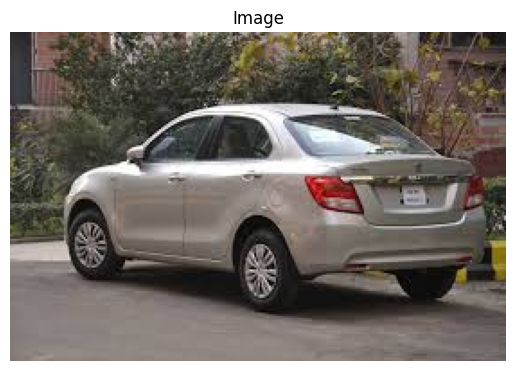

In [3]:
plt.axis('off')
plt.title("Image")
plt.imshow(img)

## Image Conversion to Different Types

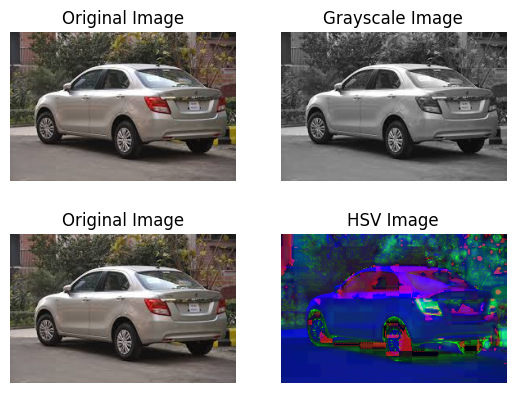

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# cv2.imshow("Grayscale Image", gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.Figure(figsize=(10, 5))
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(2,2,2)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("HSV Image")
plt.axis('off')
plt.imshow(hsv)